<a href="https://colab.research.google.com/github/lucius8959/GitPractice/blob/master/prac_tensor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

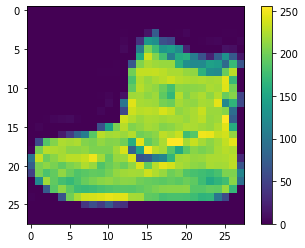

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

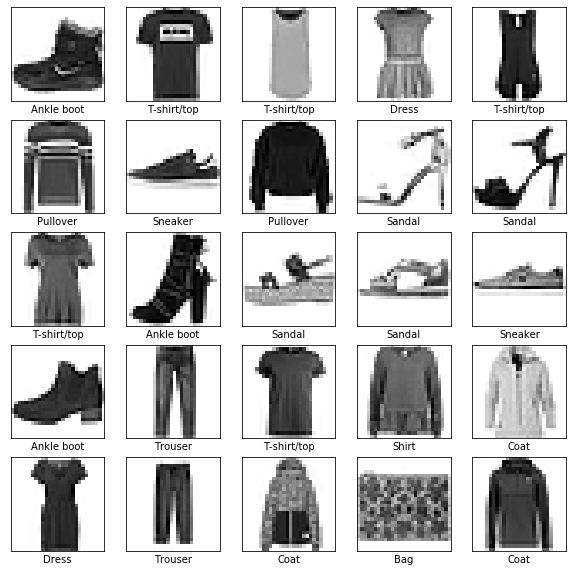

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4959 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3738 - accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3358 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3120 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2926 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2800 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2691 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2584 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2484 - accuracy: 0.9068
Epoch 10/10
60

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3456 - accuracy: 0.8825

Test accuracy: 0.8825


In [0]:
predictions = model.predict(test_images)

In [30]:
predictions[0]

array([4.9949338e-09, 6.0574306e-09, 2.6929065e-08, 8.6261548e-10,
       5.8305346e-08, 2.5378913e-05, 7.8399331e-08, 6.5770480e-03,
       2.9073128e-09, 9.9339736e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

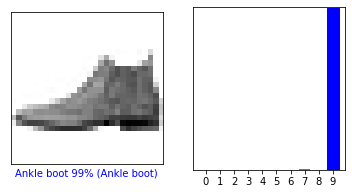

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

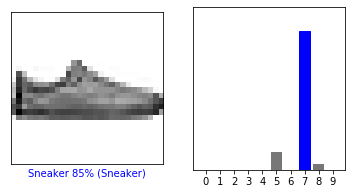

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

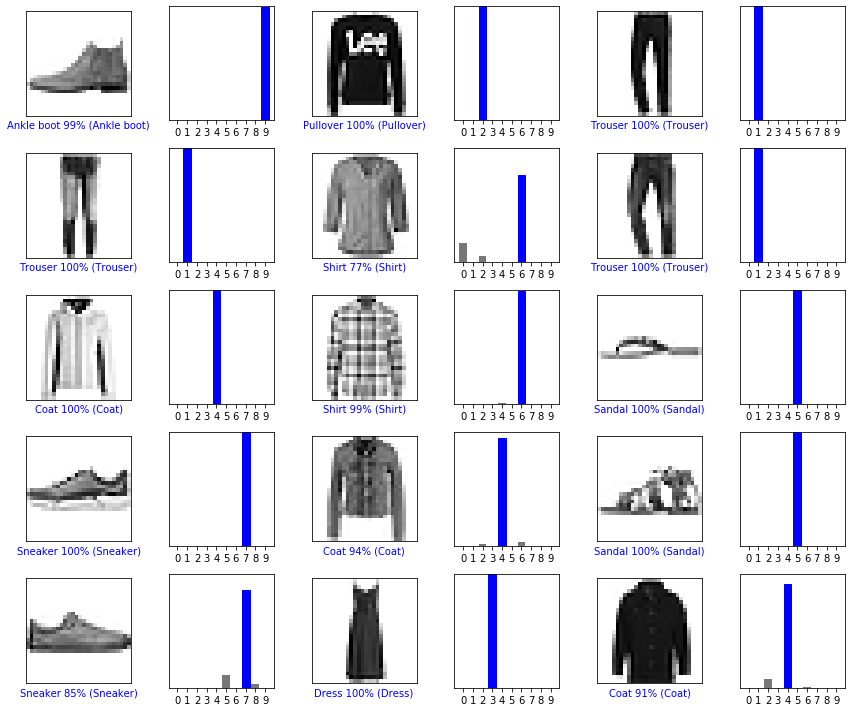

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9246641e-05 5.4754665e-13 9.9974543e-01 4.2473487e-13 1.6950929e-04
  2.1655075e-11 5.5832967e-05 9.8720424e-18 8.5401929e-12 1.5505514e-16]]


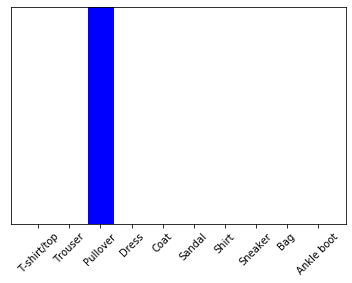

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
np.argmax(predictions_single[0])

2